In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier

In [4]:
train_data = np.loadtxt('landsat_train.csv', delimiter=',')

Y_train = train_data[:,0]
X_train = train_data[:,1:]

In [5]:
val_data = np.loadtxt('landsat_validation.csv', delimiter=',')

Y_val = val_data[:,0]
X_val = val_data[:,1:]

In [6]:
area_data = np.loadtxt('landsat_area.csv', delimiter=',')

In [7]:
def rdmForests(trainingFeatures, trainingLabels):
    predictor = RandomForestClassifier(n_estimators=10, bootstrap=True, max_features=9, criterion="gini")
    predictor.fit(trainingFeatures, trainingLabels)
    return predictor

In [8]:
rdmForest = rdmForests(X_train, Y_train)

In [9]:
val_acc = rdmForest.score(X_val,Y_val)
print(val_acc)

0.752349205350872


In [10]:
rdmForest.apply(area_data)
predictions = rdmForest.predict(area_data)

(-0.5, 2999.5, 2999.5, -0.5)

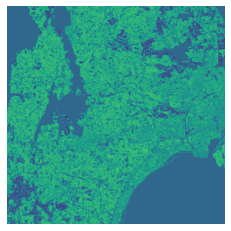

In [11]:
Image = np.reshape(predictions, (3000,3000)) #Image representation of the data
plt.imshow(Image)
plt.axis('off')